In [132]:
function pseudoCFT(Datos::Array,dt::Number)
    #En este esquema los datos estan pseudo centrados alrededor de un
    #ficticio t_0
    N=length(Datos)
    datosalternados=zeros(Datos)
    result=zeros(Datos)
    for j=1:N
        datosalternados[j]=(-1)^(j-1)*Datos[j]
    end    
    result=fft(datosalternados)*dt
    for j=1:N
        result[j]=(-1)^(j-1)*result[j] 
    end
    dw=2*pi/(dt*N)
    dominio=(-N/2)*dw:dw:(N/2-1)*dw
    return (dominio,result)
end


pseudoCFT (generic function with 1 method)

In [93]:
x = -25.0:0.1:24.9
z = map(y->exp(-y*y), x);

In [94]:
length(x)

500

In [96]:
@time (omega, fsin)=pseudoCFT(z, 0.1)

elapsed time: 0.000311837 seconds (26800 bytes allocated)


(-31.415926535897935:0.12566370614359174:31.290262829754344,Complex{Float64}[-2.22045e-17+0.0im,1.11022e-17-2.18575e-17im,-5.55112e-17-1.11022e-17im,1.11022e-17-3.747e-17im,0.0+2.35922e-17im,-0.0+1.11022e-17im,0.0+4.30211e-17im,1.11022e-17+1.38778e-17im,-2.22045e-17-1.249e-17im,-3.33067e-17+4.85723e-17im  …  -9.74378e-18+1.29865e-17im,-3.74994e-17-4.91777e-18im,3.61409e-17+3.69997e-17im,-8.66443e-17+3.36934e-17im,1.08676e-18+2.74111e-17im,-1.08305e-16+3.20657e-17im,4.54957e-17-1.84066e-17im,1.16456e-17+9.88451e-17im,-2.11177e-17+9.05244e-17im,-1.08676e-18+6.00775e-17im])

In [63]:
using PyPlot

In [41]:
size(omega)

(21,)

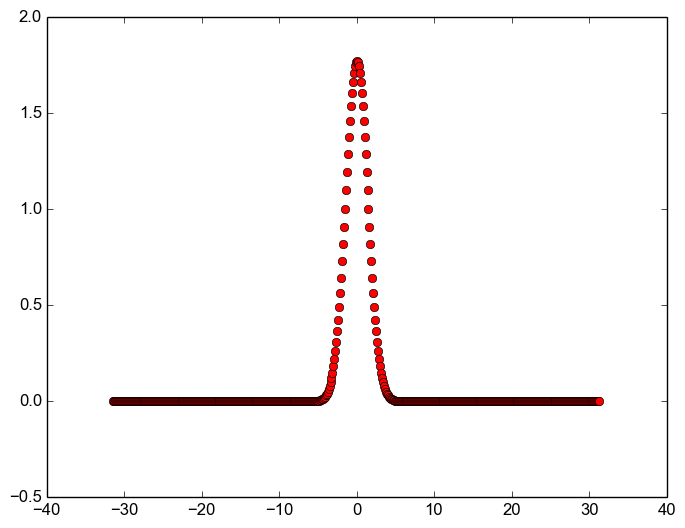

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f19d0c86250>

In [97]:
plot(omega,fsin, "ro")

In [100]:
testdata=readdlm("example55-55.dat");

In [112]:
testdata=testdata[1:9000]

9000-element Array{Float64,1}:
  -2.01416
 -10.0708 
 -16.1133 
 -22.1558 
 -18.1274 
 -18.1274 
  12.085  
  -4.02832
 -22.1558 
  -6.04248
 -16.1133 
  -8.05664
 -30.2124 
   ⋮      
  -8.05664
   2.01416
 -22.1558 
   4.02832
  10.0708 
  30.2124 
 -22.1558 
  24.1699 
   0.0    
  12.085  
  26.1841 
  -6.04248

In [101]:
deltat=1/7022

0.00014240956992309884

In [113]:
(rango,TestFFT)=pseudoCFT(testdata, deltat)

(-22060.263613507526:4.9022808030016725:22055.361332704528,Complex{Float64}[0.0731431+0.0im,0.0548598+0.158115im,-0.195322-0.236966im,-0.218083-0.0641172im,-0.0104729+0.331901im,-0.124478+0.1756im,0.142651+0.129245im,0.0541923-0.0624475im,-0.0466186-0.0472915im,-0.40894+0.105285im  …  0.0691126+0.216926im,-0.40894-0.105285im,-0.0466186+0.0472915im,0.0541923+0.0624475im,0.142651-0.129245im,-0.124478-0.1756im,-0.0104729-0.331901im,-0.218083+0.0641172im,-0.195322+0.236966im,0.0548598-0.158115im])

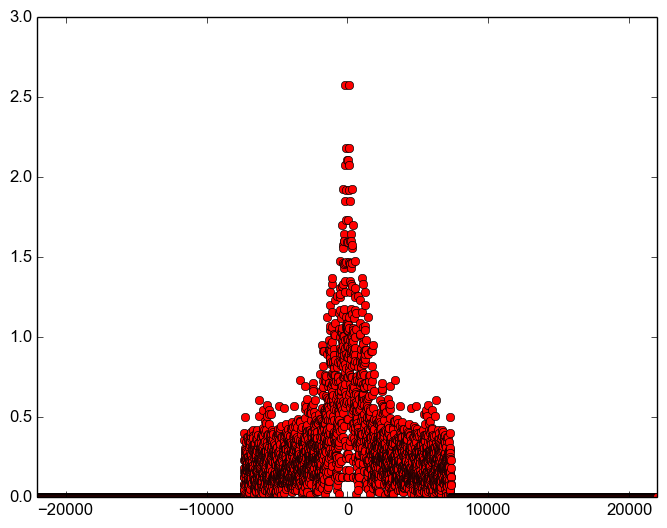

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f19c5930b90>

In [123]:
PyPlot.xlim(-22000,22000)
plot(rango,abs(TestFFT), "ro")

In [117]:
2*pi/(deltat*9000)

4.9022808030016725

In [126]:
TestFFT

9000-element Array{Complex{Float64},1}:
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
    ⋮     
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im
 0.0+0.0im

In [143]:
(t,goback)=pseudoCFT(TestFFT, 4.902280803)

(-0.6408430646541635:0.00014240956992314744:0.6407006550842403,Complex{Float64}[1.90356+0.621081im,47.2903-1.6843im,62.8259-2.30562im,60.8714-0.622221im,57.4925+1.68273im,59.0185+2.30519im,60.4985+0.623359im,53.554-1.68117im,34.5725-2.30476im,7.01849-0.624494im  …  -119.284-2.3073im,-109.994-0.617646im,-58.6288+1.68899im,-9.84682+2.30688im,-5.66375+0.618794im,-51.8242-1.68743im,-114.461-2.30646im,-147.614-0.619939im,-127.436+1.68586im,-66.1605+2.30604im])

In [144]:
goback=goback/9

9000-element Array{Complex{Float64},1}:
  0.211507+0.069009im 
   5.25448-0.187144im 
   6.98065-0.25618im  
   6.76349-0.0691357im
   6.38805+0.18697im  
   6.55761+0.256132im 
   6.72205+0.0692621im
   5.95045-0.186796im 
   3.84139-0.256085im 
  0.779832-0.0693883im
   -2.3859+0.186622im 
  -4.78136+0.256036im 
  -5.78317+0.0695141im
          ⋮           
  -1.51177+0.0684996im
  -8.46339-0.187839im 
  -13.2538-0.256366im 
  -12.2215-0.0686274im
  -6.51431+0.187666im 
  -1.09409+0.25632im  
 -0.629306+0.0687548im
  -5.75824-0.187492im 
  -12.7179-0.256274im 
  -16.4016-0.0688821im
  -14.1596+0.187318im 
  -7.35117+0.256227im 

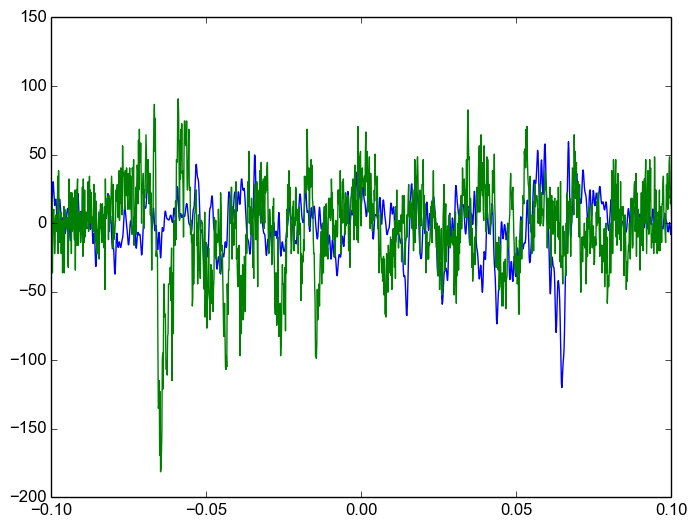

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f19c4db8d10>

In [145]:
PyPlot.xlim(-0.1,0.1)
plot(t, goback)
plot(t, testdata)